## Python Diabetes Project Data Samples

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
#import data sets
female_diabetes = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetes.csv')
all_diabetes = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetic_data.csv')

In [3]:
#view head to see dataset columns
female_diabetes.head()
all_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# opting to drop encounter ID and patient number from data because it has no medical correlation
del all_diabetes['encounter_id']
del all_diabetes['patient_nbr']
#all_diabetes.drop(columns=['encounter_id', 'patient_nbr'])
all_diabetes.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


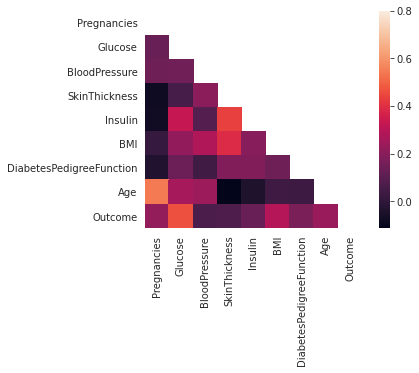

In [5]:
'''
view matriix (Nathalie's plot) to determine high corrolation areas
this plot is for female diabetes data
'''

corr_mat = female_diabetes.corr()
#mask to eliminate flipped data
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True)

In [6]:
'''
notice in the heatmap above  3 points of high correlation:
    - skin thickness / pregnancies
    - insulin / pregnancies
    - age / skin thickness
also notice 2 points of interest with relatively high correlation:
    - diabetes pedigree function / pregnancies
    - age / insulin
these relations are plotted below
'''

'\nnotice in the heatmap above  3 points of high correlation:\n    - skin thickness / pregnancies\n    - insulin / pregnancies\n    - age / skin thickness\nalso notice 2 points of interest with relatively high correlation:\n    - diabetes pedigree function / pregnancies\n    - age / insulin\nthese relations are plotted below\n'

In [8]:
#plot age as it relates to skin thickness and pregnancies


Text(0, 0.5, 'Insulin')

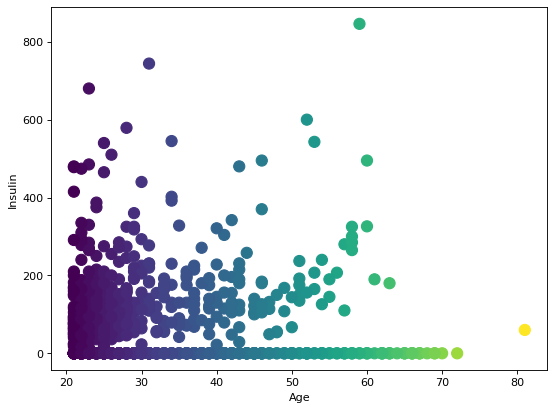

In [7]:
# Bubble plot 

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(female_diabetes['Age'], female_diabetes['Insulin'], c=female_diabetes['Age'], s=100)
plt.xlabel('Age')
plt.ylabel('Insulin')

# TODO: trim bottom row and possibly outliers

In [ ]:
#sns.pairplot(female_diabetes)

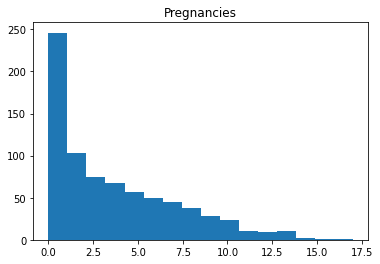

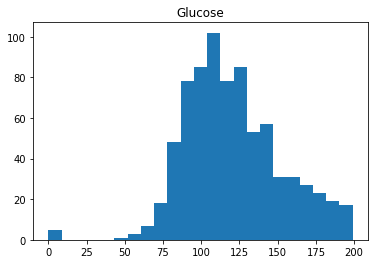

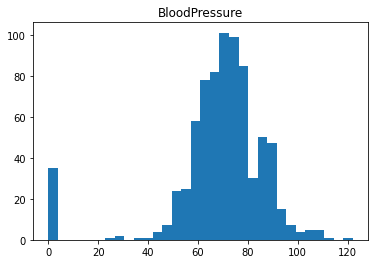

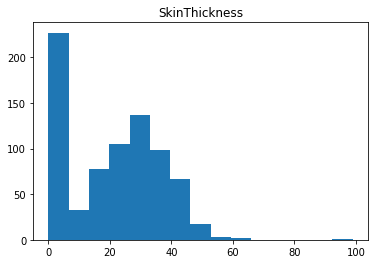

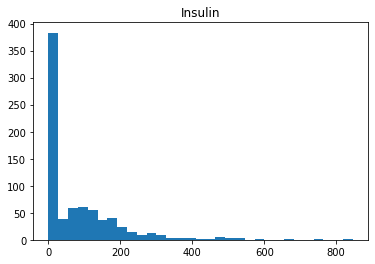

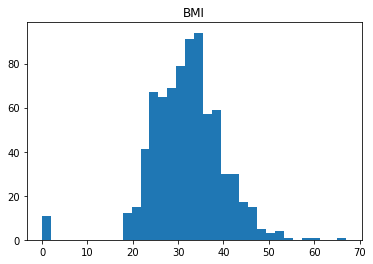

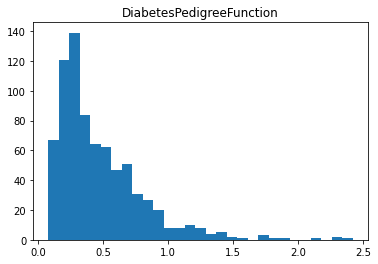

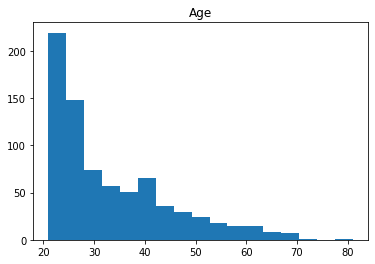

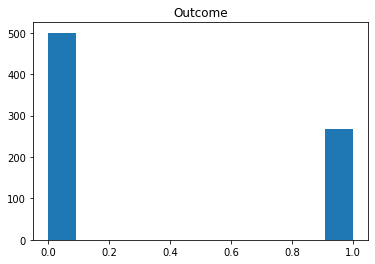

In [8]:
plt.hist(female_diabetes['Pregnancies'], bins='auto')
plt.title('Pregnancies')
plt.show()

plt.hist(female_diabetes['Glucose'], bins='auto')
plt.title('Glucose')
plt.show()

plt.hist(female_diabetes['BloodPressure'], bins='auto')
plt.title('BloodPressure')
plt.show()

plt.hist(female_diabetes['SkinThickness'], bins='auto')
plt.title('SkinThickness')
plt.show()

plt.hist(female_diabetes['Insulin'], bins='auto')
plt.title('Insulin')
plt.show()

plt.hist(female_diabetes['BMI'], bins='auto')
plt.title('BMI')
plt.show()

plt.hist(female_diabetes['DiabetesPedigreeFunction'], bins='auto')
plt.title('DiabetesPedigreeFunction')
plt.show()

plt.hist(female_diabetes['Age'], bins='auto')
plt.title('Age')
plt.show()

plt.hist(female_diabetes['Outcome'], bins='auto')
plt.title('Outcome')
plt.show()

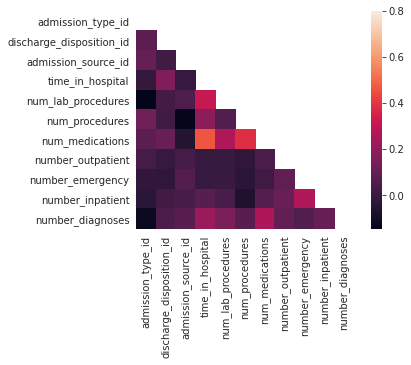

In [9]:
'''
view matriix (Nathalie's plot) to determine high corrolation areas
this plot is for all diabetes data
'''

corr_mat = all_diabetes.corr()
#mask to eliminate flipped data
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True)

Text(0, 0.5, 'time')

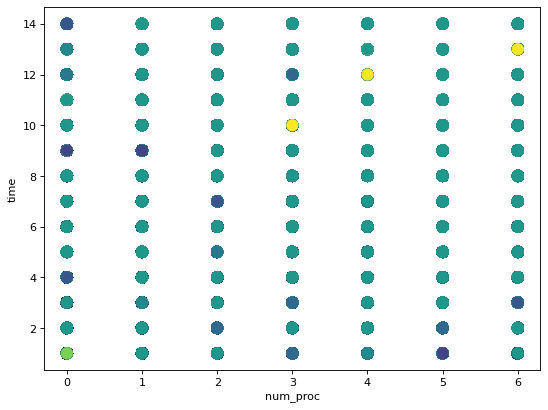

In [10]:
# Bubble plot 

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(all_diabetes['num_procedures'], all_diabetes['time_in_hospital'], c=all_diabetes['number_diagnoses'], s=100)
plt.xlabel('num_proc')
plt.ylabel('time')

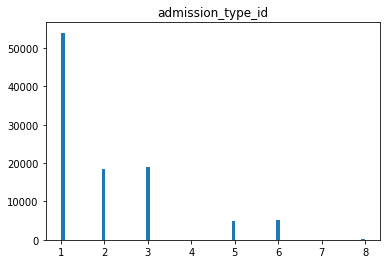

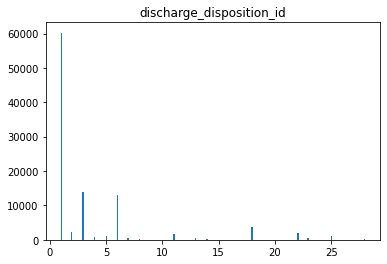

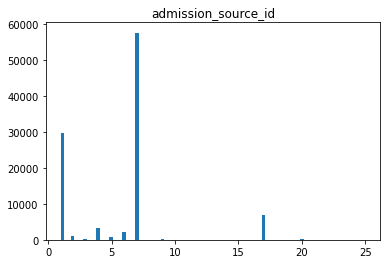

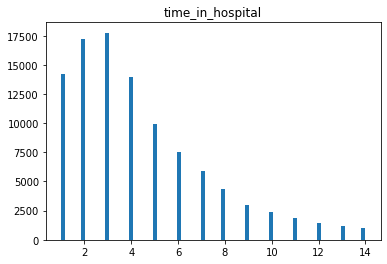

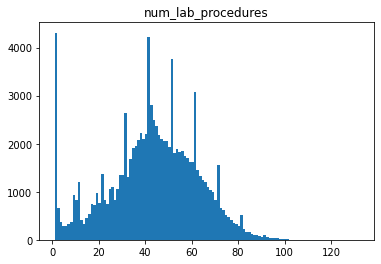

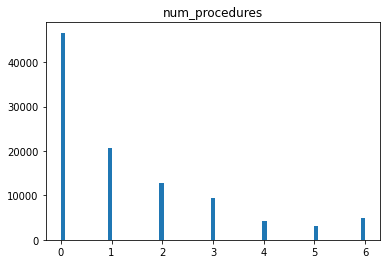

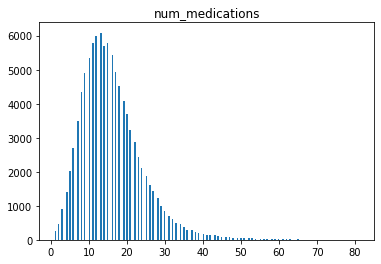

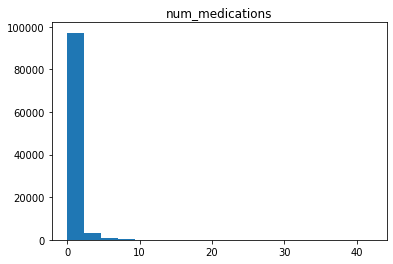

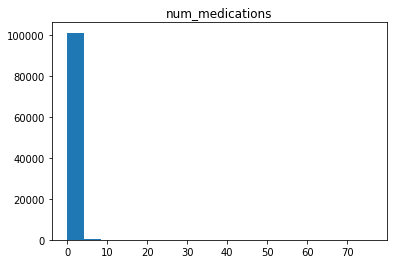

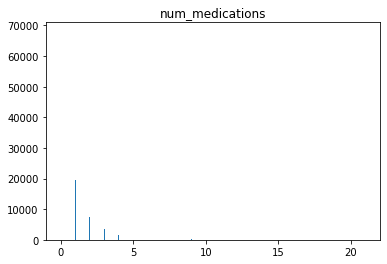

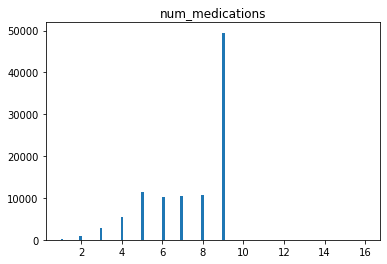

In [20]:
plt.hist(all_diabetes['admission_type_id'], bins='auto')
plt.title('admission_type_id')
plt.show()

plt.hist(all_diabetes['discharge_disposition_id'], bins='auto')
plt.title('discharge_disposition_id')
plt.show()

plt.hist(all_diabetes['admission_source_id'], bins='auto')
plt.title('admission_source_id')
plt.show()

plt.hist(all_diabetes['time_in_hospital'], bins='auto')
plt.title('time_in_hospital')
plt.show()

plt.hist(all_diabetes['num_lab_procedures'], bins='auto')
plt.title('num_lab_procedures')
plt.show()

plt.hist(all_diabetes['num_procedures'], bins='auto')
plt.title('num_procedures')
plt.show()

plt.hist(all_diabetes['num_medications'], bins='auto')
plt.title('num_medications')
plt.show()

plt.hist(all_diabetes['number_outpatient'], bins='auto')
plt.title('number_outpatient')
plt.show()

plt.hist(all_diabetes['number_emergency'], bins='auto')
plt.title('number_emergency')
plt.show()

plt.hist(all_diabetes['number_inpatient'], bins='auto')
plt.title('number_inpatient')
plt.show()

plt.hist(all_diabetes['number_diagnoses'], bins='auto')
plt.title('number_diagnoses')
plt.show()

KeyboardInterrupt: ignored

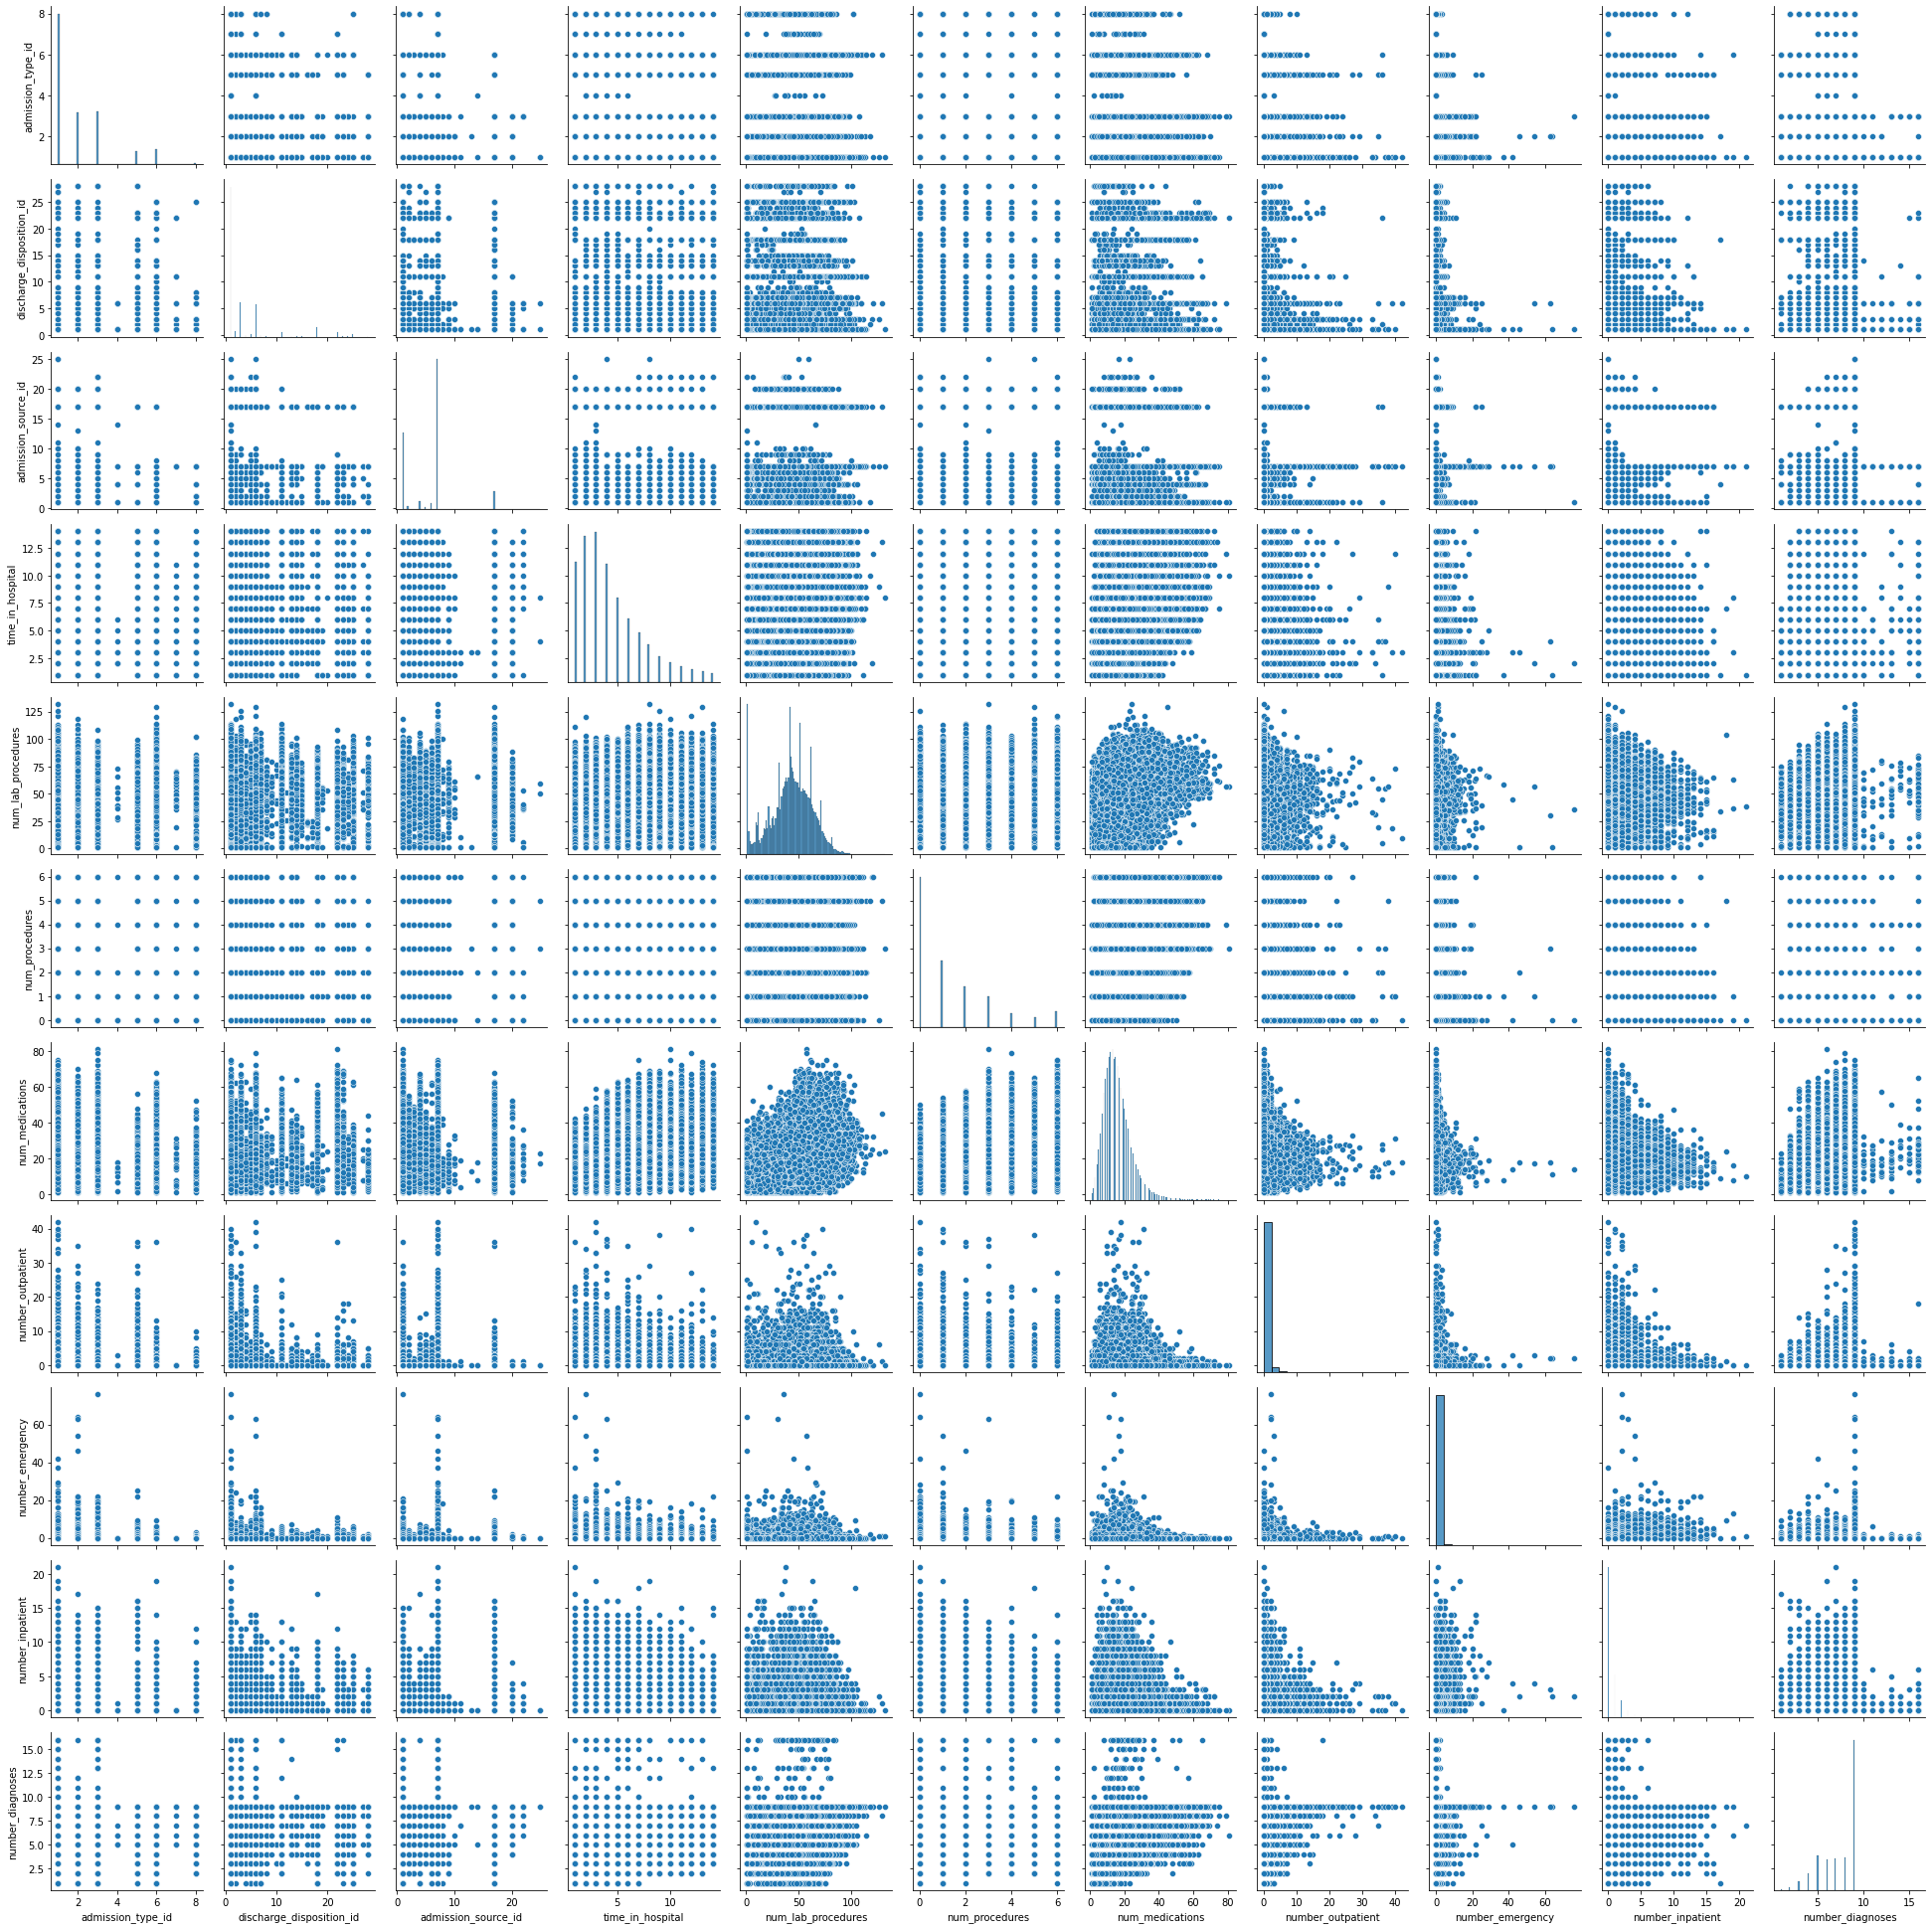